In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Loading dataset
data=pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [6]:
data['Gender']=data['Gender'].astype('category')
data['Gender']=data['Gender'].cat.codes

In [7]:
data.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

#Independent & dependent variables

In [8]:
X=data.iloc[:,[2,3]]
y=data['Purchased']

In [9]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

#Splitting the data set using train test split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=0)


In [12]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (280, 2)
X_test (120, 2)
y_train (280,)
y_test (120,)


#Feature Scaling

In [13]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

#Model Building - Applying SVC on training set using kernel linear

In [15]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(X_train_scaled,y_train)

SVC(kernel='linear', random_state=0)

In [16]:
#checking accuracy training data
y_pred_train = model.predict(X_train_scaled)
pd.Series(y_pred_train).value_counts()

0    200
1     80
dtype: int64

In [17]:
metrics.accuracy_score(y_pred_train,y_train)

0.8285714285714286

In [18]:
#checking accuracy testing data
y_pred_test = model.predict(X_test_scaled)
pd.Series(y_pred_test).value_counts()

0    87
1    33
dtype: int64

In [19]:
metrics.accuracy_score(y_pred_test,y_test)

0.8666666666666667

In [20]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        79
           1       0.88      0.71      0.78        41

    accuracy                           0.87       120
   macro avg       0.87      0.83      0.84       120
weighted avg       0.87      0.87      0.86       120



In [21]:
confusion_matrix(y_test,y_pred_test)

array([[75,  4],
       [12, 29]])

**Out of 120 prediction 104 predictions are coreect only 16 prediction are not correct**

In [22]:
model.score(X_test_scaled,y_test)

0.8666666666666667

#Model Building - Applying SVC on training set using kernel RBF

**here we can use higher value for the rbf parameters gamma & C, acuuracy can improve or might get decrease as well**

In [23]:
from sklearn.svm import SVC
model1=SVC(kernel='rbf', random_state=0)
model1.fit(X_train_scaled,y_train)

SVC(random_state=0)

In [24]:
#checking accuracy training data
y_pred_train1 = model1.predict(X_train_scaled)
pd.Series(y_pred_train1).value_counts()

0    171
1    109
dtype: int64

In [25]:
metrics.accuracy_score(y_pred_train1,y_train)

0.9178571428571428

In [26]:
#checking accuracy testing data
y_pred_test1 = model1.predict(X_test_scaled)
pd.Series(y_pred_test1).value_counts()

0    76
1    44
dtype: int64

In [27]:
metrics.accuracy_score(y_pred_test1,y_test)

0.9083333333333333

In [28]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



In [29]:
confusion_matrix(y_test,y_pred_test1)

array([[72,  7],
       [ 4, 37]])

**Out of 120 prediction 109 predictions are coreect only 11 prediction are not correct**

In [30]:
model1.score(X_test_scaled,y_test)

0.9083333333333333

#Model Building - Applying SVC on training set using kernel polynomial

In [31]:
from sklearn.svm import SVC
model2=SVC(kernel='poly',degree=4)
model2.fit(X_train_scaled,y_train)

SVC(degree=4, kernel='poly')

In [32]:
#checking accuracy training data
y_pred_train2 = model2.predict(X_train_scaled)
pd.Series(y_pred_train2).value_counts()

0    208
1     72
dtype: int64

In [33]:
metrics.accuracy_score(y_pred_train2,y_train)

0.8142857142857143

In [34]:
#checking accuracy testing data
y_pred_test2 = model2.predict(X_test_scaled)
pd.Series(y_pred_test2).value_counts()

0    93
1    27
dtype: int64

In [35]:
metrics.accuracy_score(y_pred_test2,y_test)

0.8166666666666667

In [36]:
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        79
           1       0.85      0.56      0.68        41

    accuracy                           0.82       120
   macro avg       0.83      0.76      0.77       120
weighted avg       0.82      0.82      0.81       120



In [37]:
confusion_matrix(y_test,y_pred_test2)

array([[75,  4],
       [18, 23]])

In [38]:
model2.score(X_test_scaled,y_test)

0.8166666666666667

**Insights that we are getting from data is that our data is of non-linear nature that is why we are getting good accuracy score when we used methods of classification in svc that are rbf, and linear is also giving good accuracy.**

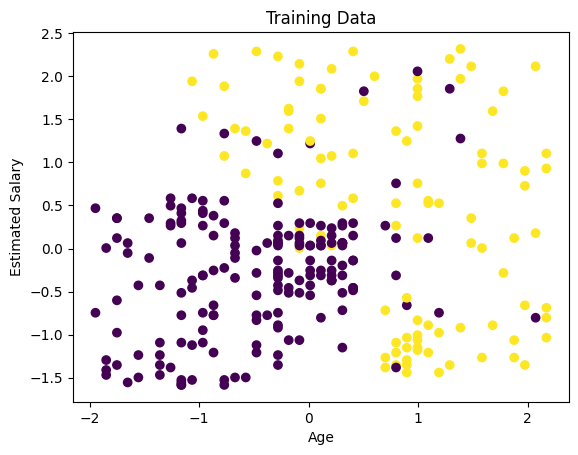

In [39]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=y_train)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Training Data")
plt.show()

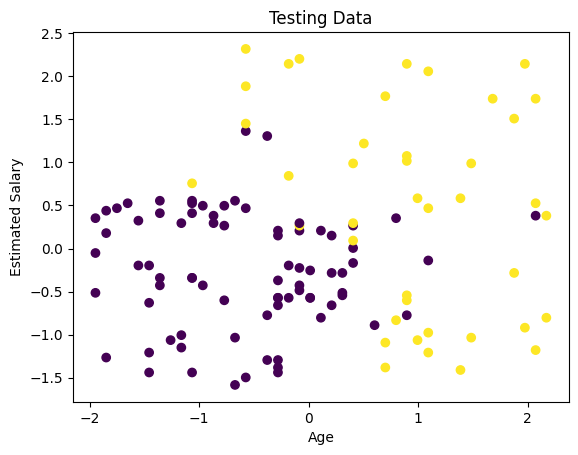

In [40]:
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1], c=y_test)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Testing Data")
plt.show()

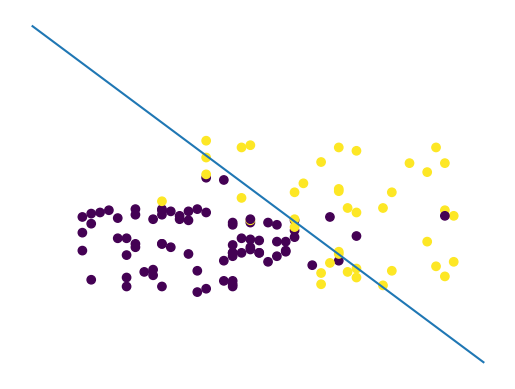

In [41]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(X_train_scaled,y_train)

#Predecting Test Set results
y_pred_test=model.predict(X_test_scaled)

#Plotting data points
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_test)

#creating the hyperplane
w=model.coef_[0]
a= -w[0]/w[1]
xx= np.linspace(-2.5,2.5)
yy= a * xx -(model.intercept_[0]) / w[1]

#Plot the hyperplane
plt.plot(xx,yy)
plt.axis("off"), plt.show();
